# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [20]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

#### Important: Restart the Kernel before you move on to the next step.

In [21]:
# Install requirements
!python -m pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import datasets , transforms
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform =  transforms.Compose([ transforms.ToTensor(),
                                  transforms.Normalize((0.5,), (0.5,))])

# Create a training set and define training dataloader
trainset = datasets.MNIST('~/deeplearning-project/MNIST/Train', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create a test set and define test dataloader
testset = datasets.MNIST('~/deeplearning-project/MNIST/Test', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12902487.49it/s]


Extracting /root/deeplearning-project/MNIST/Train/MNIST/raw/train-images-idx3-ubyte.gz to /root/deeplearning-project/MNIST/Train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 344530.92it/s]


Extracting /root/deeplearning-project/MNIST/Train/MNIST/raw/train-labels-idx1-ubyte.gz to /root/deeplearning-project/MNIST/Train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3189110.10it/s]


Extracting /root/deeplearning-project/MNIST/Train/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/deeplearning-project/MNIST/Train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9375260.22it/s]


Extracting /root/deeplearning-project/MNIST/Train/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/deeplearning-project/MNIST/Train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12751337.75it/s]


Extracting /root/deeplearning-project/MNIST/Test/MNIST/raw/train-images-idx3-ubyte.gz to /root/deeplearning-project/MNIST/Test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 347760.30it/s]


Extracting /root/deeplearning-project/MNIST/Test/MNIST/raw/train-labels-idx1-ubyte.gz to /root/deeplearning-project/MNIST/Test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3227377.04it/s]


Extracting /root/deeplearning-project/MNIST/Test/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/deeplearning-project/MNIST/Test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4411887.16it/s]

Extracting /root/deeplearning-project/MNIST/Test/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/deeplearning-project/MNIST/Test/MNIST/raw



## Justify your preprocessing

There is need for preprocessing the images from numpy to torch tensor and then normalise the images from all colour channels to between  0 to 1 so that the input dimensionality is managable.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [4]:
# checkout the input and output spaces.
dataiter = iter(trainloader) #queue containing the batches
images, labels = next(dataiter) #fetches the next batch in the queue
print(type(images))
print(images.shape)
print(labels.shape)
print(labels)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([9, 1, 3, 0, 6, 3, 2, 9, 3, 4, 6, 8, 3, 8, 8, 5, 5, 7, 7, 4, 0, 9, 5, 1,
        1, 7, 9, 0, 7, 0, 5, 4, 4, 6, 0, 0, 8, 6, 8, 6, 8, 9, 1, 0, 4, 4, 6, 9,
        7, 2, 3, 2, 3, 7, 6, 0, 1, 7, 1, 5, 3, 0, 4, 1])


In [5]:
# get the size of the trainset
len(trainloader.dataset)

60000

In [6]:
# ge the size of the test set
len(testloader.dataset)

10000

2


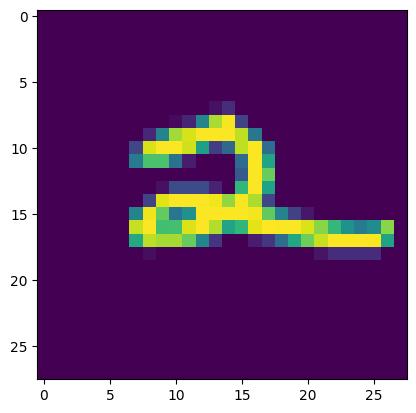

3


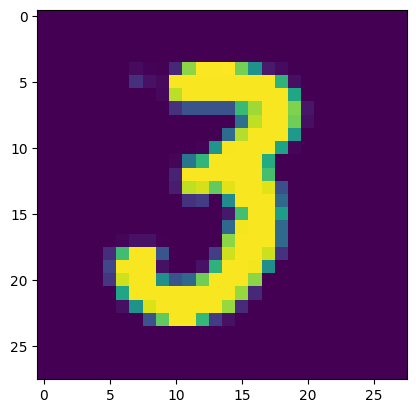

0


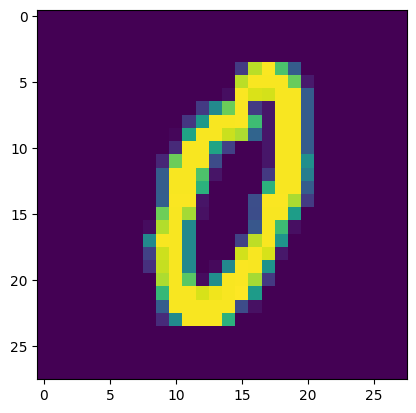

1


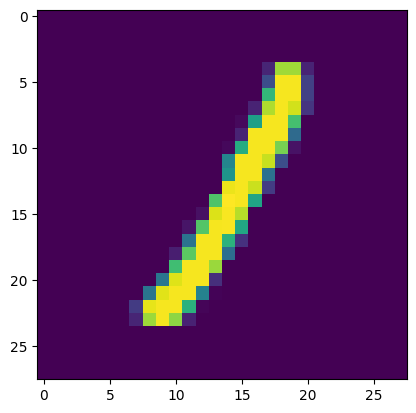

5


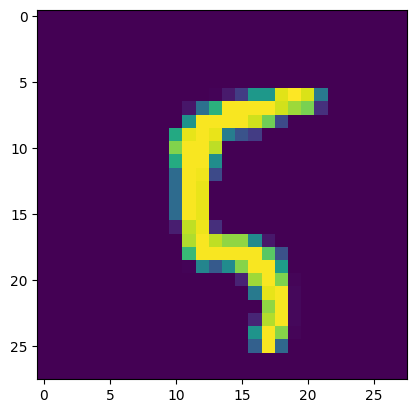

In [7]:
# Explore data
# training set goes first
show5(trainloader)

8


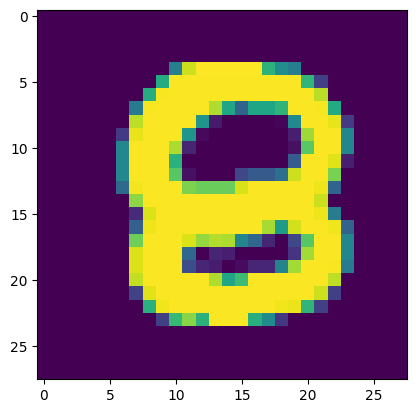

7


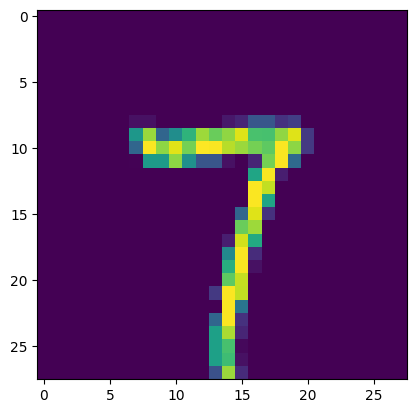

3


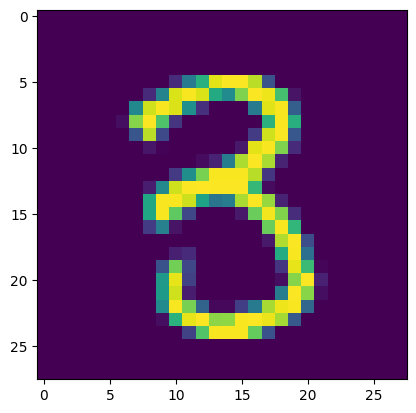

0


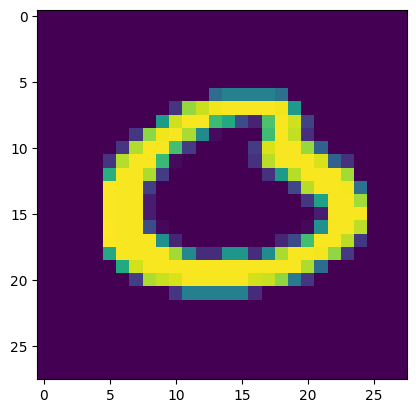

1


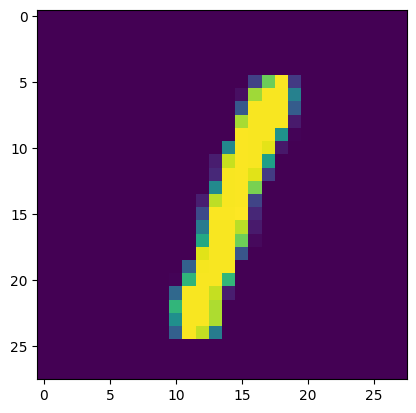

In [8]:
# testing set
show5(testloader)

#### Create a validation Set from the Trainset

In [9]:
trainset, validset = torch.utils.data.random_split(trainset,[50000,10000])

trainloader_new = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64, shuffle=True)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Define dropout layers with a dropout probability (e.g., 0.2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Apply dropout after the second layer
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  # Apply dropout after the rhird layer
        x=self.fc4(x) #output shape ((64,10)) #No dropout added
        #print(x.shape)
        x = F.log_softmax(x, dim=1) #logsoftmax for each row
        #print(x.shape) #output shape ((64,10))
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
model = Classifier()
# ToDo: Answer. Is the use of this Loss function Correct/
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
# define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

# put the model to run on cuda
model.to(device)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [13]:
#Training Loop
epochs = 10
TLL=[]
VLL=[]
valid_loss=0;running_loss=0;
for e in range(epochs):
    running_loss = 0
    valid_loss = 0

    #ToDo: Start training
    model.train()
    for images, labels in trainloader_new:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    #ToDo: Start validation
    model.eval()
    for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)
        log_ps = model(images)
        loss = criterion(log_ps, labels) #summing
        valid_loss += loss.item()
    else:
        T=running_loss/len(trainloader_new) #Error/batch
        V=valid_loss/len(validloader)    #Error/batch
        print(f"Epoch: {e}", f"    Training loss: {T}",f"    Validation loss: {V}")
        TLL.append(T)
        VLL.append(V)

Epoch: 0     Training loss: 0.5153688806802263     Validation loss: 0.23659750131095292
Epoch: 1     Training loss: 0.30424752662344207     Validation loss: 0.20881401920679268
Epoch: 2     Training loss: 0.27250038486097933     Validation loss: 0.1926098803568418
Epoch: 3     Training loss: 0.24343955148097193     Validation loss: 0.19618644427721668
Epoch: 4     Training loss: 0.23703367195909134     Validation loss: 0.15035033440602955
Epoch: 5     Training loss: 0.22435323211133404     Validation loss: 0.17548518169932303
Epoch: 6     Training loss: 0.21857617658508174     Validation loss: 0.1534112004124245
Epoch: 7     Training loss: 0.21276800983997485     Validation loss: 0.19116516648584111
Epoch: 8     Training loss: 0.2104760912578086     Validation loss: 0.13431007405565043
Epoch: 9     Training loss: 0.20280075459586233     Validation loss: 0.13457461887863792


Plot the training loss (and validation loss/accuracy, if recorded).

Text(0.5, 1.0, 'Training losses vs Validation losses')

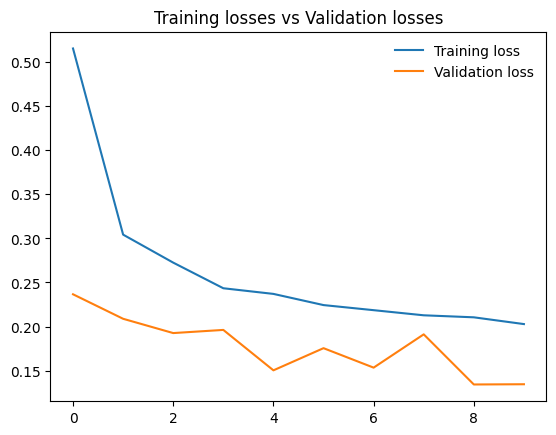

In [14]:
title = f'Training losses vs Validation losses'
plt.plot(TLL, label='Training loss')
plt.plot(VLL, label='Validation loss')
plt.legend(frameon=False)
plt.title(title)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:

test_loss = 0
test_accuracy = 0
TestLL = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)

        test_loss += batch_loss.item()

        # Calculate accuracy
        ps = logps
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    else:
        TestLL.append(test_loss/len(testloader))
        print(
            f"Test loss: {test_loss/len(testloader):.3f}.. "
            f"Test accuracy: {test_accuracy/len(testloader):.3f}")
        test_loss = 0
        test_accuracy = 0

Test loss: 0.132.. Test accuracy: 0.964


The test Accuracy is: 96.4%

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
# The params
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# model re-training loop
epochs = 20
TLL=[]
VLL=[]
valid_loss=0;running_loss=0;
for e in range(epochs):
    running_loss = 0
    valid_loss = 0

    #ToDo: Start training
    model.train()
    for images, labels in trainloader_new:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    #ToDo: Start validation
    model.eval()
    for images, labels in validloader:
        images, labels = images.to(device), labels.to(device)
        log_ps = model(images)
        loss = criterion(log_ps, labels) #summing
        valid_loss += loss.item()
    else:
        T=running_loss/len(trainloader_new) #Error/batch
        V=valid_loss/len(validloader)    #Error/batch
        print(f"Epoch: {e}", f"    Training loss: {T}",f"    Validation loss: {V}")
        TLL.append(T)
        VLL.append(V)


Epoch: 0     Training loss: 0.17186373281602263     Validation loss: 0.12019476503916797
Epoch: 1     Training loss: 0.1586171877966441     Validation loss: 0.1132547353768045
Epoch: 2     Training loss: 0.15057574911578975     Validation loss: 0.12325448014292938
Epoch: 3     Training loss: 0.15174497204982793     Validation loss: 0.1392012953604008
Epoch: 4     Training loss: 0.15069553847222225     Validation loss: 0.12571953873114458
Epoch: 5     Training loss: 0.1420245604789661     Validation loss: 0.11991069836328459
Epoch: 6     Training loss: 0.14186052979706118     Validation loss: 0.11610057627022931
Epoch: 7     Training loss: 0.1423813615713621     Validation loss: 0.1183395094674223
Epoch: 8     Training loss: 0.14202908101989448     Validation loss: 0.11920214238558795
Epoch: 9     Training loss: 0.13823090450655992     Validation loss: 0.13540897973083482
Epoch: 10     Training loss: 0.139858679359724     Validation loss: 0.11933635750779538
Epoch: 11     Training loss:

Text(0.5, 1.0, 'Training losses vs Validation losses')

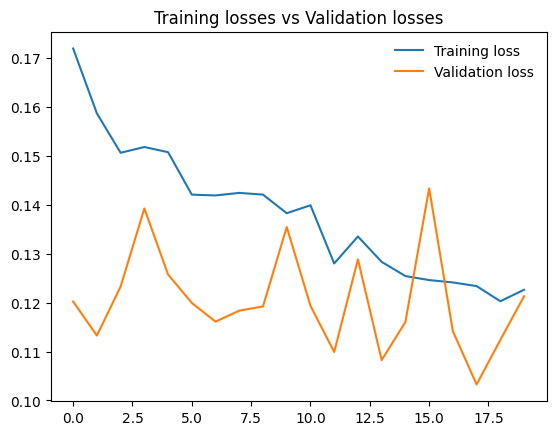

In [17]:
# Viusalize the train and valid
title = f'Training losses vs Validation losses'
plt.plot(TLL, label='Training loss')
plt.plot(VLL, label='Validation loss')
plt.legend(frameon=False)
plt.title(title)

The model tends to over fit on the data, with more ephocs,
possible reason here is that the dataset is quite small

In [18]:
# Test the Tweaked model
test_loss = 0
test_accuracy = 0
TestLL = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)

        test_loss += batch_loss.item()

        # Calculate accuracy
        ps = logps
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        test_accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

    else:
        TestLL.append(test_loss/len(testloader))
        print(
            f"Test loss: {test_loss/len(testloader):.3f}.. "
            f"Test accuracy: {test_accuracy/len(testloader):.3f}")
        test_loss = 0
        test_accuracy = 0

Test loss: 0.114.. Test accuracy: 0.971


The Test Accuracy for Re-training is: 97.1%

## Saving your model
Using `torch.save`, save your model for future loading.

In [22]:
# save the state dict for the neural network.
torch.save(model.state_dict(),'MNIST_Classifier.pt')